In [45]:
# Libs 

# Pandas
import pandas as pd

# dataset iris
from sklearn.datasets import load_iris


In [46]:
# retornando os dados
data = load_iris()

In [47]:
# transformando em um dataframe
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [48]:
# selecionando apenas as colunas de pétala e esses targets
iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']]

In [49]:
# separando x e y
x = iris1.drop('target', axis=1)
y = iris1.target

In [50]:
# fazendo o train_teste_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

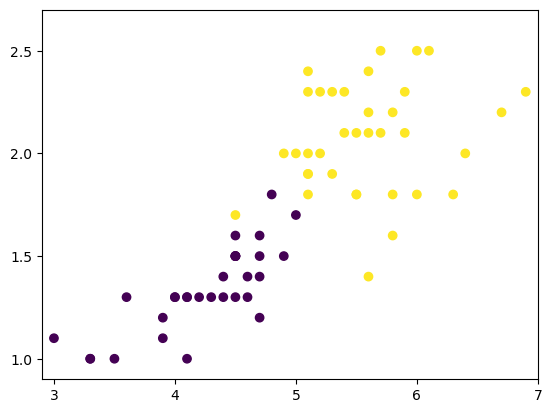

In [63]:
# visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], 
           x_train['petal width (cm)'], c=y_train)

ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7],
       ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

plt.show()

In [52]:
# importando a árvore de decisão
from sklearn import tree

In [53]:
# criando o classificador
clf = tree.DecisionTreeClassifier(random_state=42)

In [54]:
# fazendo o fit com os dados de treino
clf = clf.fit(x_train, y_train)

In [55]:
# verificando o score
clf.score(x_train,y_train)

1.0

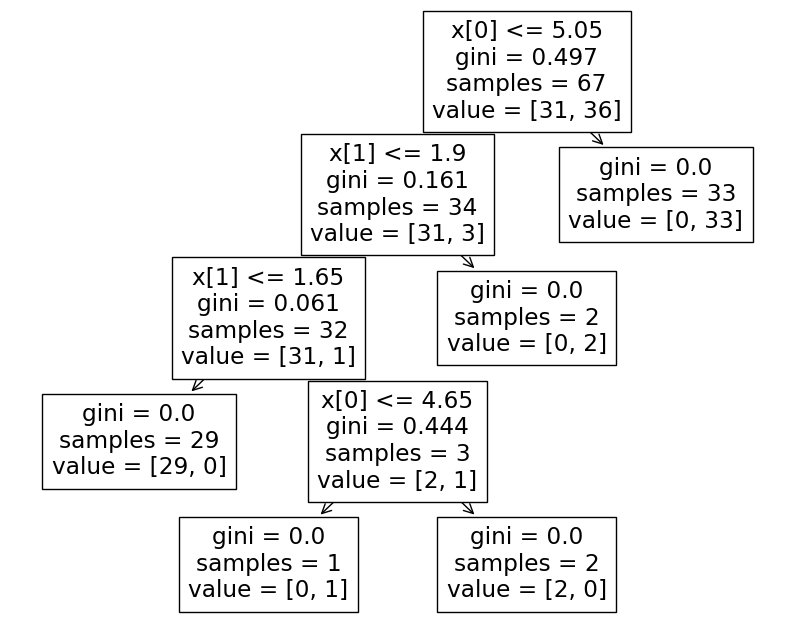

In [62]:
# visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf)

plt.show();

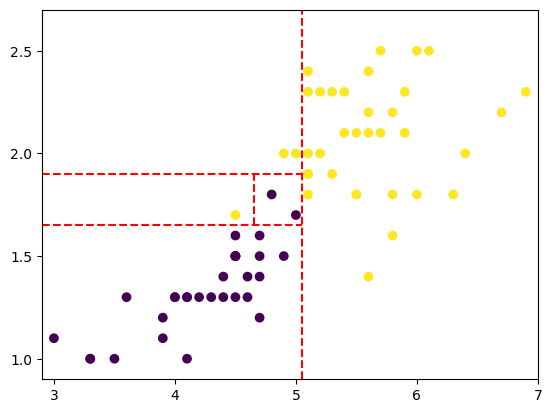

In [73]:
# podemos adicionar essas regras no nosso gráfico

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], 
           x_train['petal width (cm)'], c=y_train)

# ax.plot( [1,5] , [ 0.8 ,0.8 ] , '--r' )

ax.plot( [5.05, 5.05], [0.9,2.7], '--r')
ax.plot( [2.9, 5.05], [1.9,1.9], '--r')
ax.plot( [2.9, 5.05], [1.65,1.65], '--r')
ax.plot( [4.65, 4.65], [1.65, 1.9], '--r')

ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7],
       ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

plt.show()

In [58]:
# fazendo a previsão e avaliando o erro
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 6,  8]], dtype=int64)

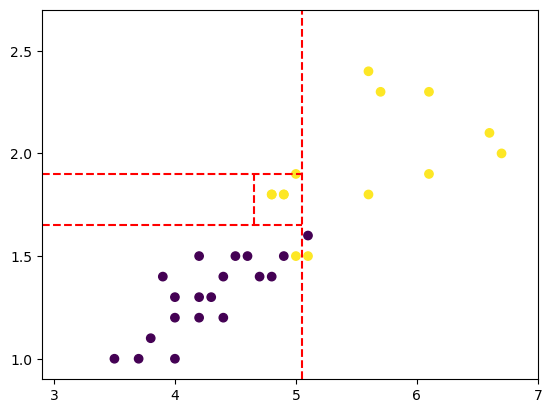

In [75]:
# visualizando esses dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter(x_test['petal length (cm)'], 
           x_test['petal width (cm)'], c=y_test)

# ax.plot( [1,5] , [ 0.8 ,0.8 ] , '--r' )

ax.plot( [5.05, 5.05], [0.9,2.7], '--r')
ax.plot( [2.9, 5.05], [1.9,1.9], '--r')
ax.plot( [2.9, 5.05], [1.65,1.65], '--r')
ax.plot( [4.65, 4.65], [1.65, 1.9], '--r')

ax.set(xlim=(2.9, 7), xticks=[3, 4, 5, 6, 7],
       ylim=(0.9, 2.7), yticks=[1, 1.5, 2, 2.5])

plt.show()

In [79]:
# saparando x e y da base completa
x = iris.drop('target', axis=1)
y = iris.target

In [80]:
# fazendo o train_teste_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [81]:
# criando o classificador e fazendo o fit
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

In [82]:
# verificando score
clf2.score( x_train, y_train )

1.0

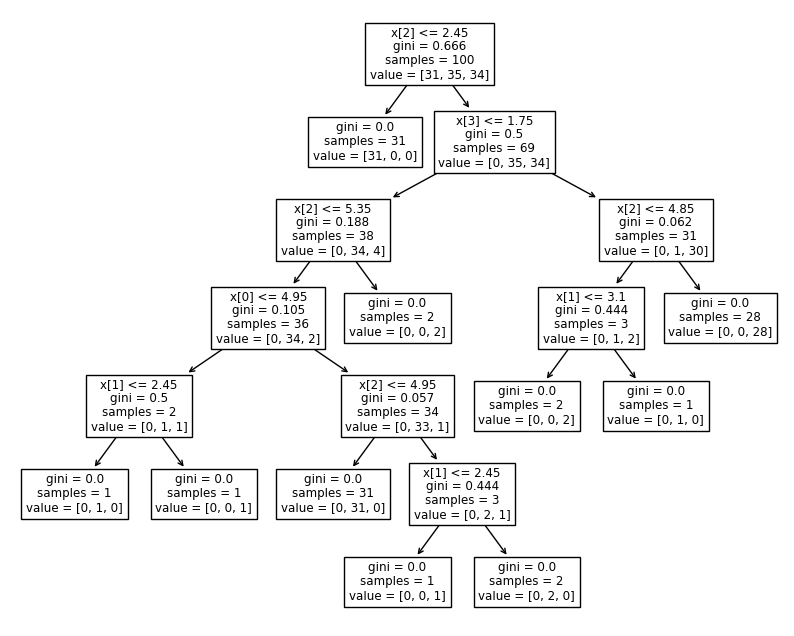

In [83]:
# visualizando essa árvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show();

In [84]:
# fazendo a previsão
y_pred2 = clf2.predict( x_test )

In [85]:
# avaliando o modelo
confusion_matrix( y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)